
========== Đang huấn luyện cho nồng độ: 250500 ==========
Epoch 1/100
266/266 [==============================] - 2s 4ms/step - loss: 0.0536 - val_loss: 0.0681
Epoch 2/100
266/266 [==============================] - 1s 3ms/step - loss: 0.0358 - val_loss: 0.0590
Epoch 3/100
266/266 [==============================] - 1s 3ms/step - loss: 0.0319 - val_loss: 0.0562
Epoch 4/100
266/266 [==============================] - 1s 3ms/step - loss: 0.0291 - val_loss: 0.0436
Epoch 5/100
266/266 [==============================] - 1s 3ms/step - loss: 0.0283 - val_loss: 0.0479
Epoch 6/100
266/266 [==============================] - 1s 3ms/step - loss: 0.0275 - val_loss: 0.0397
Epoch 7/100
266/266 [==============================] - 1s 3ms/step - loss: 0.0270 - val_loss: 0.0426
Epoch 8/100
266/266 [==============================] - 1s 4ms/step - loss: 0.0265 - val_loss: 0.0400
Epoch 9/100
266/266 [==============================] - 1s 4ms/step - loss: 0.0265 - val_loss: 0.0436
Epoch 10/100
266/266 [==========

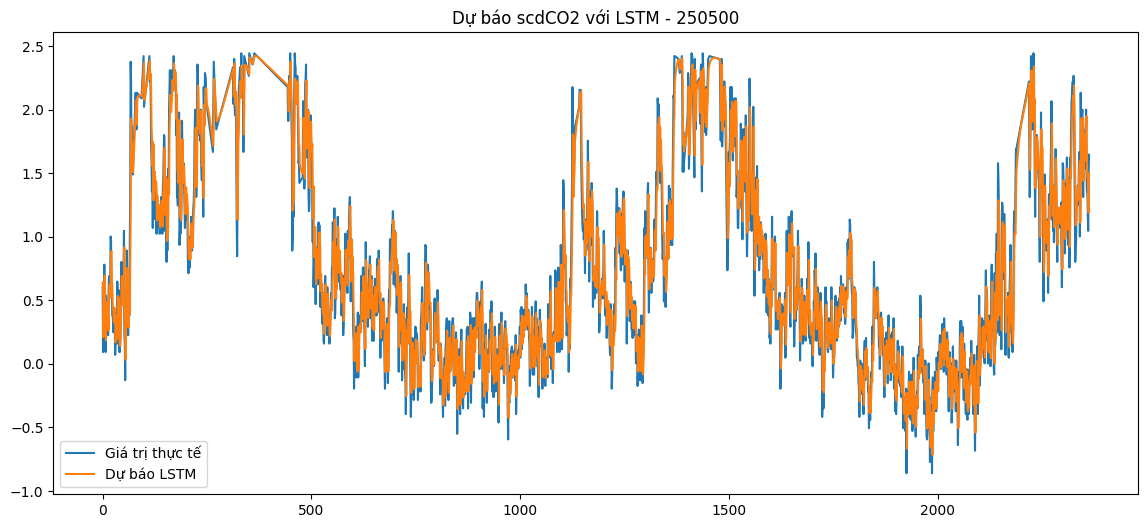


========== Đang huấn luyện cho nồng độ: 500500 ==========
Epoch 1/100
194/194 [==============================] - 2s 4ms/step - loss: 0.1649 - val_loss: 0.0804
Epoch 2/100
194/194 [==============================] - 1s 3ms/step - loss: 0.0963 - val_loss: 0.0635
Epoch 3/100
194/194 [==============================] - 1s 3ms/step - loss: 0.0846 - val_loss: 0.0538
Epoch 4/100
194/194 [==============================] - 1s 3ms/step - loss: 0.0767 - val_loss: 0.0474
Epoch 5/100
194/194 [==============================] - 1s 3ms/step - loss: 0.0694 - val_loss: 0.0436
Epoch 6/100
194/194 [==============================] - 1s 3ms/step - loss: 0.0673 - val_loss: 0.0419
Epoch 7/100
194/194 [==============================] - 1s 3ms/step - loss: 0.0674 - val_loss: 0.0399
Epoch 8/100
194/194 [==============================] - 1s 3ms/step - loss: 0.0644 - val_loss: 0.0411
Epoch 9/100
194/194 [==============================] - 1s 3ms/step - loss: 0.0665 - val_loss: 0.0404
Epoch 10/100
194/194 [==========

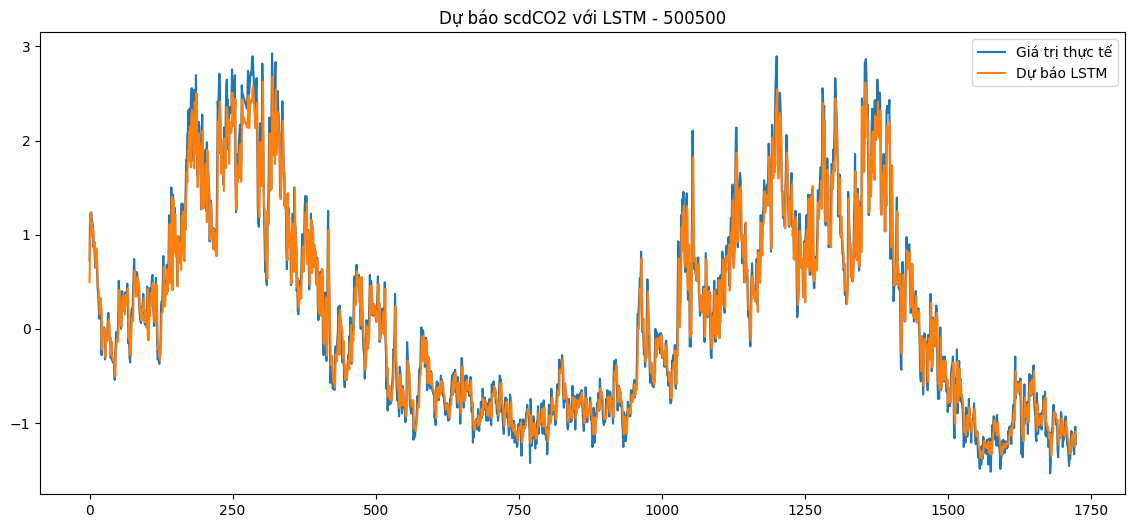


========== Đang huấn luyện cho nồng độ: 750500 ==========
Epoch 1/100
592/592 [==============================] - 3s 4ms/step - loss: 0.1234 - val_loss: 0.0595
Epoch 2/100
592/592 [==============================] - 2s 3ms/step - loss: 0.0805 - val_loss: 0.0532
Epoch 3/100
592/592 [==============================] - 2s 3ms/step - loss: 0.0750 - val_loss: 0.0518
Epoch 4/100
592/592 [==============================] - 2s 3ms/step - loss: 0.0734 - val_loss: 0.0514
Epoch 5/100
592/592 [==============================] - 2s 3ms/step - loss: 0.0728 - val_loss: 0.0516
Epoch 6/100
592/592 [==============================] - 2s 3ms/step - loss: 0.0726 - val_loss: 0.0545
Epoch 7/100
592/592 [==============================] - 2s 3ms/step - loss: 0.0726 - val_loss: 0.0518
Epoch 8/100
592/592 [==============================] - 2s 3ms/step - loss: 0.0724 - val_loss: 0.0527
Epoch 9/100
592/592 [==============================] - 2s 3ms/step - loss: 0.0724 - val_loss: 0.0522
Epoch 10/100
592/592 [==========

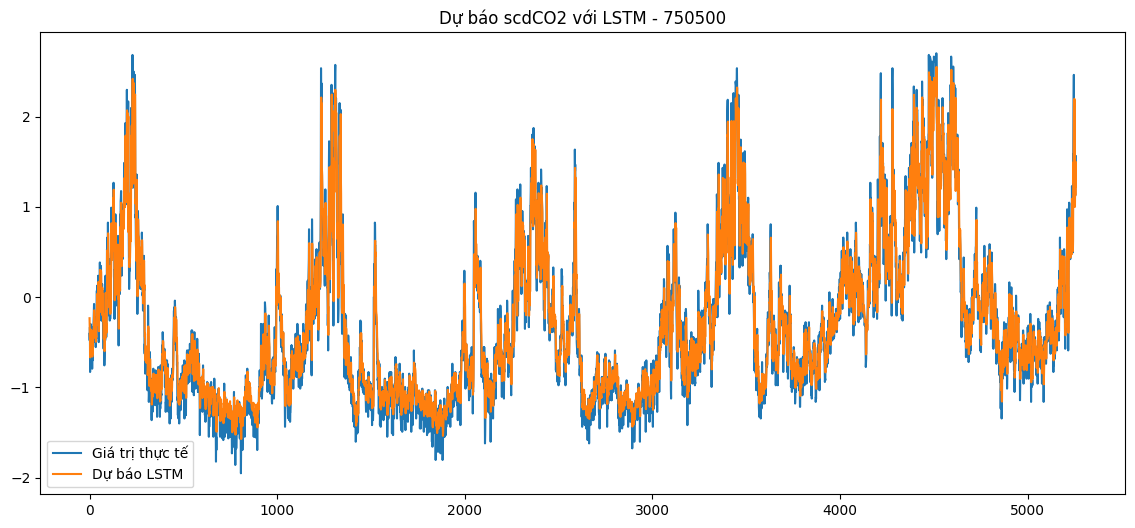


Bảng tổng hợp chỉ số các nồng độ:
  nồng độ        R2       MAE        MAPE      RMSE
0  250500  0.922280  0.173189  117.191807  0.234612
1  500500  0.941876  0.194390  817.751650  0.263313
2  750500  0.929904  0.173921  124.535972  0.236375


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Đường dẫn dữ liệu
base_dir = r'E:\Khóa luận\Data\Phase 2'
concentration_files = {
    '250500': 'preprocessed_250500.csv',
    '500500': 'preprocessed_500500.csv',
    '750500': 'preprocessed_750500.csv'
}

# Cột mục tiêu
target_col = 'scdCO2'  # Thay đổi nếu muốn dự báo biến khác
window_size = 24

metrics = []

for label, fname in concentration_files.items():
    print(f'\n========== Đang huấn luyện cho nồng độ: {label} ==========')
    file_path = os.path.join(base_dir, fname)
    df = pd.read_csv(file_path)
    df['Date time'] = pd.to_datetime(df['Date time'])
    df = df.sort_values('Date time').reset_index(drop=True)

    # Chuẩn bị dữ liệu cho LSTM (univariate)
    values = df[target_col].values
    def create_sequences(data, window=24):
        X, y = [], []
        for i in range(len(data) - window):
            X.append(data[i:i+window])
            y.append(data[i+window])
        return np.array(X), np.array(y)
    X, y = create_sequences(values, window=window_size)

    # Chia train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Xây dựng mô hình LSTM
    model = Sequential()
    model.add(LSTM(64, input_shape=(window_size, 1), return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Huấn luyện
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.1,
        callbacks=[early_stop],
        verbose=1
    )

    # Dự báo
    y_pred = model.predict(X_test).flatten()

    # Tính các chỉ số
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / (y_test + 1e-8))) * 100
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f'R^2: {r2:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'MAPE: {mape:.2f}%')
    print(f'RMSE: {rmse:.4f}')

    metrics.append({
        'nồng độ': label,
        'R2': r2,
        'MAE': mae,
        'MAPE': mape,
        'RMSE': rmse
    })

    # Vẽ biểu đồ so sánh dự báo và thực tế
    plt.figure(figsize=(14,6))
    plt.plot(y_test, label='Giá trị thực tế')
    plt.plot(y_pred, label='Dự báo LSTM')
    plt.title(f'Dự báo {target_col} với LSTM - {label}')
    plt.legend()
    plt.show()

# Xuất bảng tổng hợp chỉ số
metrics_df = pd.DataFrame(metrics)
print('\nBảng tổng hợp chỉ số các nồng độ:')
print(metrics_df)